In [47]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *

base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

In [48]:
hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

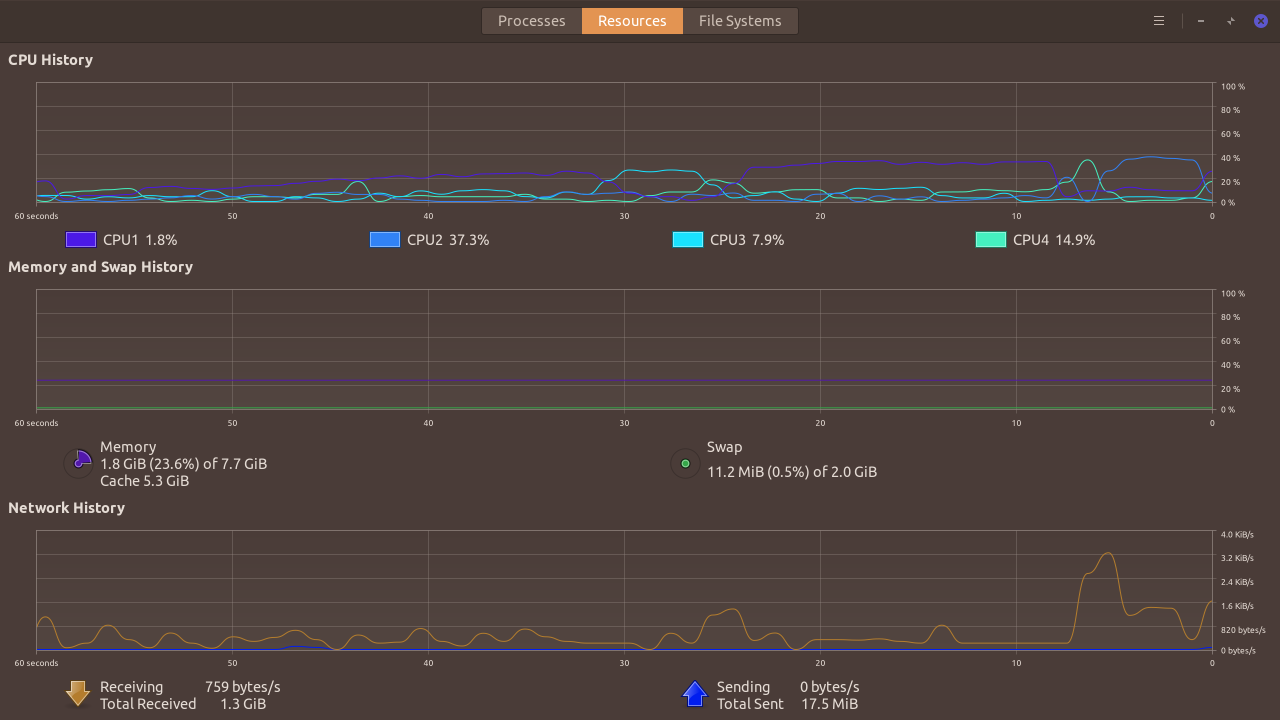

In [49]:
import PIL.Image

frame = hdmi_in.readframe()
image = PIL.Image.fromarray(frame)
image

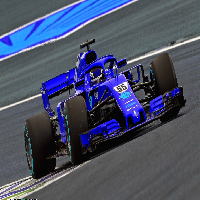

In [16]:
new_img = image.resize((200,200))
new_img

In [27]:
new_img.save('pic1.jpg')

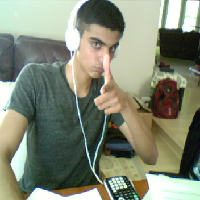

In [21]:
orig_img_path = 'pic2.jpg'
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null

img = PIL.Image.open(orig_img_path)
new_img_2 = img.resize((200,200))
new_img_2

In [24]:
new_img_2.save('pic2.jpg')

In [29]:
import cv2
import numpy as np
import random
  
  
# Encryption function
def encrypt():
      
    # img1 and img2 are the
    # two input images
    img1 = cv2.imread('pic1.jpg')
    img2 = cv2.imread('pic2.jpg')
      
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            for l in range(3):
                  
                # v1 and v2 are 8-bit pixel values
                # of img1 and img2 respectively
                v1 = format(img1[i][j][l], '08b')
                #print("v1 for ", i,j,l)
                #print(v1)
                #print(v1[:4])
                v2 = format(img2[i][j][l], '08b')
                #print("v2 for ", i,j,l)
                #print(v2)
                #print(v2[:4])  
                # Taking 4 MSBs of each image
                v3 = v1[:4] + v2[:4]
                #print("v3 for ", i,j,l)
                #print(v3)
                  
                img1[i][j][l]= int(v3, 2)
                  
    cv2.imwrite('pic3in2.png', img1)
  
      
# Decryption function
def decrypt():
      
    # Encrypted image
    img = cv2.imread('pic3in2.png') 
    width = img.shape[0]
    height = img.shape[1]
      
    # img1 and img2 are two blank images
    img1 = np.zeros((width, height, 3), np.uint8)
    img2 = np.zeros((width, height, 3), np.uint8)
      
    for i in range(width):
        for j in range(height):
            for l in range(3):
                v1 = format(img[i][j][l], '08b')
                v2 = v1[:4] + chr(random.randint(0, 1)+48) * 4
                v3 = v1[4:] + chr(random.randint(0, 1)+48) * 4
                  
                # Appending data to img1 and img2
                img1[i][j][l]= int(v2, 2)
                img2[i][j][l]= int(v3, 2)
      
    # These are two images produced from
    # the encrypted image
    cv2.imwrite('pic2_re.png', img1)
    cv2.imwrite('pic3_re.png', img2)

In [31]:
from time import time
t0=time()
encrypt()
t1=time()

print("time took to encrypt: ", (t1-t0))

time took to encrypt:  8.313365459442139


In [38]:
t2=time()
decrypt()
t3=time()

print("time took to decrypt: ", (t3-t2))

time took to decrypt:  16.09773302078247


In [32]:
#Hardware acceleration experimentation

In [33]:
img1 = cv2.imread('pic1.jpg')

In [45]:
%%microblaze base.PMODA
int add(int a,int b){
    return a+b;
}